In [1]:
import sys, os
sys.path.append('../')
import matplotlib.pyplot as plt
from scripts.scalability.postprocessing import read_case_dict, read_json, read_solution




In [2]:
scalability_folder = '/home/ge72tih/dev/scalability'
json_file = '2019_05_28_13_08_17.json'

json_path = os.path.join(scalability_folder,json_file)


# reading json file
case_dict = read_json(json_path)

In [3]:

solution_dict = read_case_dict(scalability_folder ,case_dict)

In [113]:
solution_dict

import pandas as pd
def solution_dict_to_df(solution_dict):

    domains = list(solution_dict.keys())
    col = []
    col.extend(domains)
    df = pd.DataFrame(columns=col)

    mapdict = {}
    mapdict['Total Time [s]'] = 'solver_time'
    mapdict['Number of Iterations'] = 'PCGP_iterations'
    mapdict['PCPG time [s]'] = 'time_PCPG'
    mapdict['Preprocessing [s]'] = 'local_matrix_time'
    mapdict['Interface size'] = 'lambda_size'
    mapdict['Kernel size'] = 'alpha_size'
    for row_label, atribute in mapdict.items():
        row = []
        for key in domains:
            row.extend(['{:2.2f}'.format(getattr(solution_dict[key],atribute))])
        df.loc[row_label] = row
    return df
    
df = solution_dict_to_df(solution_dict)

tol = case_dict['24']['scalability_variables']['tol']

In [114]:
df

,24,48,72,96,120
Total Time [s],256.33,191.65,290.71,190.45,903.93
Number of Iterations,68.00,135.00,302.00,192.00,936.00
PCPG time [s],89.17,138.69,264.79,175.79,891.09
Preprocessing [s],110.36,30.29,13.82,4.85,4.42
Interface size,36846.00,75294.00,113742.00,152190.00,190638.00
Kernel size,69.00,141.00,213.00,285.00,357.00


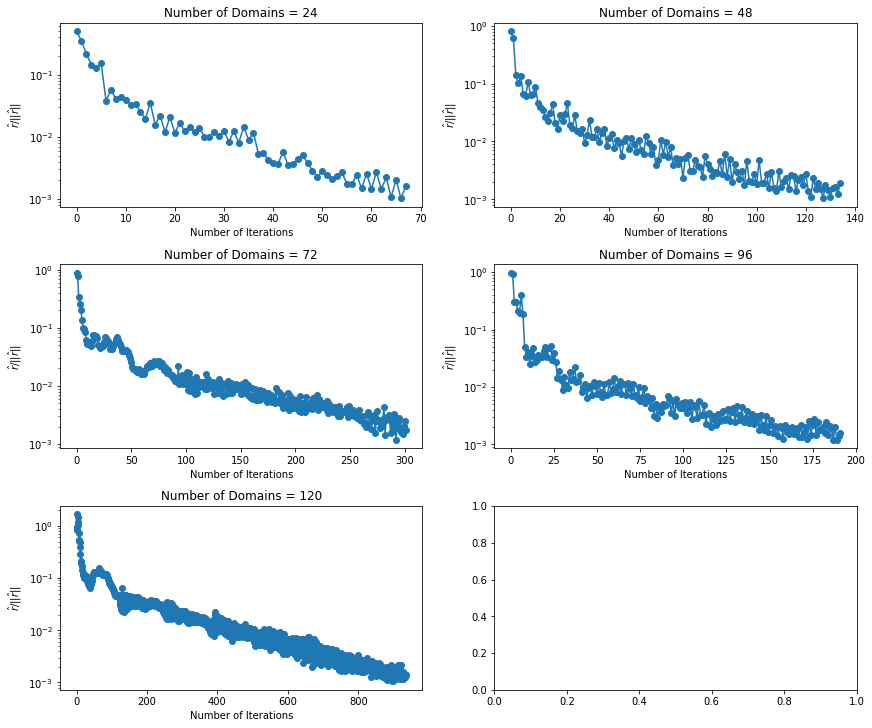

In [163]:
# define the figure size and grid layout properties
figsize = (12, 10)
cols = 2
rows = len(solution_dict) // cols + 1
import numpy as np


fig1, axs = plt.subplots(rows, cols, figsize=figsize, constrained_layout=True)
#axs = trim_axs(axs, len(cases))
for ax, case_key in zip(axs.flatten(), solution_dict):
    #ax.set_title('markevery=%s' % str(case))
    mult = tol/solution_dict[case_key].tolerance
    ax.plot(np.array(solution_dict[case_key].proj_r_hist)*mult,'-o')
    ax.set_title('Number of Domains = %s' %case_key)
    ax.set_xlabel('Number of Iterations')
    ax.set_ylabel('${\hat{r}}/{||\hat{r}||}$')
    ax.set_yscale('log')

    
    #ax.plot(C 'o', ls='-', ms=4, markevery=case)

In [172]:
pie_dict_ = {}
for key, item in solution_dict.items():
    pie_dict_[key] = {}
    pie_dict = pie_dict_[key]
    n = item.PCGP_iterations
    v1, v2, v3, v4, v5, v6 = [0.0]*6
    for i in range(n): 
        v1 += item.info_dict[i]['elaspsed_time_projection']
        v2 += item.info_dict[i]['elaspsed_time_precond']
        v3 += item.info_dict[i]['elaspsed_time_beta']
        v4 += item.info_dict[i]['elaspsed_time_F_action']
        v5 += item.info_dict[i]['elaspsed_time_alpha']
        v6 += item.info_dict[i]['elaspsed_time_iteration']
    
    pie_dict['avg_proj'] = v1/v6
    pie_dict['avg_precond'] = v2/v6
    pie_dict['avg_beta'] = v3/v6
    pie_dict['avg_F'] = v4/v6
    pie_dict['avg_alpha'] = v5/v6
    #pie_dict['avg_iter'] = v6/n
    pie_dict['overhead'] = (1.0 - (v1+v2+v3+v4+v5)/v6)
    
pie_dict = pie_dict_
    
    
  

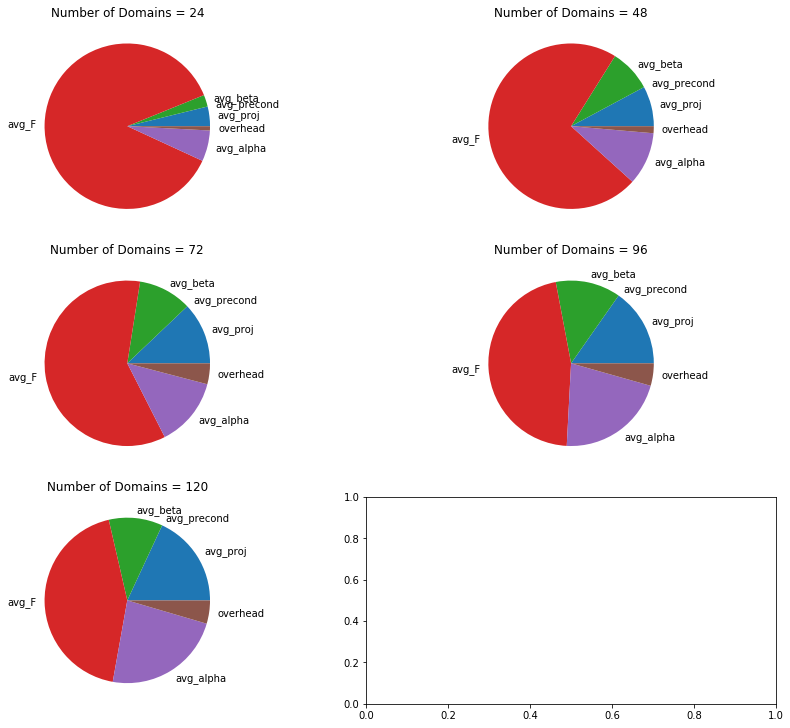

In [173]:
fig2, axs = plt.subplots(rows, cols, figsize=figsize, constrained_layout=True)
#axs = trim_axs(axs, len(cases))
for ax, case_key in zip(axs.flatten(), pie_dict):
    #ax.set_title('markevery=%s' % str(case))
    ax.pie(pie_dict[case_key].values(),labels=pie_dict[case_key].keys() )
    ax.set_title('Number of Domains = %s' %case_key)
    